# Customer Support Ticket Classification

In [1]:
# importing necessary libraries

# for data manipulation
import pandas as pd
import numpy as np
# for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# for sorting dicionary
import operator

# for plotting wordcloud
from wordcloud import WordCloud, STOPWORDS

import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# reading data
data = pd.read_csv('/content/all_tickets.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48549 entries, 0 to 48548
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             47837 non-null  object
 1   body              48549 non-null  object
 2   ticket_type       48549 non-null  int64 
 3   category          48549 non-null  int64 
 4   sub_category1     48549 non-null  int64 
 5   sub_category2     48549 non-null  int64 
 6   business_service  48549 non-null  int64 
 7   urgency           48549 non-null  int64 
 8   impact            48549 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 3.3+ MB


In [4]:
data.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4


In [5]:
data.shape

(48549, 9)

In [6]:
# basic statistics
data.describe()

,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
count,48549.000000,48549.000000,48549.000000,48549.000000,48549.000000,48549.000000,48549.000000
mean,0.713115,4.491153,11.614390,32.004634,49.482605,2.506066,3.677460
std,0.452312,1.103556,13.752707,33.602122,22.806100,0.855646,0.591513
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,2.000000,7.000000,32.000000,2.000000,3.000000
50%,1.000000,4.000000,3.000000,21.000000,49.000000,3.000000,4.000000
75%,1.000000,5.000000,21.000000,53.000000,67.000000,3.000000,4.000000
max,1.000000,12.000000,58.000000,114.000000,102.000000,3.000000,4.000000


In [7]:
duplicate=data.duplicated()
print('Total count of duplicated values :',duplicate.sum())

Total count of duplicated values : 0


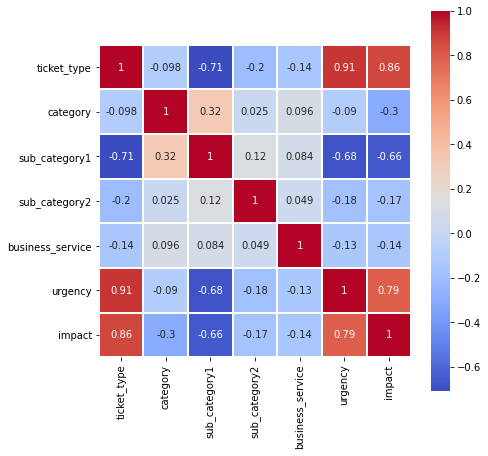

In [8]:
# correlation matrix using the heatmap
corr_mat=data.corr()
plt.figure(figsize = corr_mat.shape)
sns.heatmap(data=corr_mat,annot = True,cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

**OBSERVATIONS** \
From the correlation matrix, we can deduce that ticket_type, urgency and impact have very high correlations.

# Explanatory Data Analysis

## Distributions or Univariate Analysis

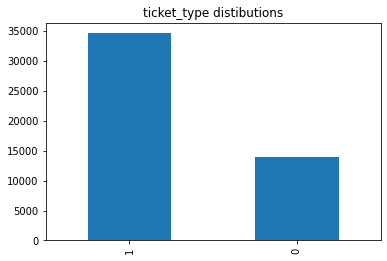

In [9]:
data['ticket_type'].value_counts().plot(kind='bar')
plt.title('ticket_type distibutions')
plt.show()

* More than 70% of ticket generated, required human-interventions( ticket-type = 1 ).
* The given dataset is imbalanced.

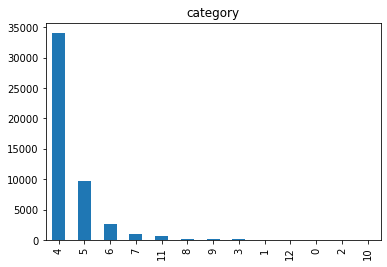

In [10]:
data['category'].value_counts().plot(kind='bar')
plt.title('category')
plt.show()

* Out of the ticket generated, most of them belongs to `category` 4.

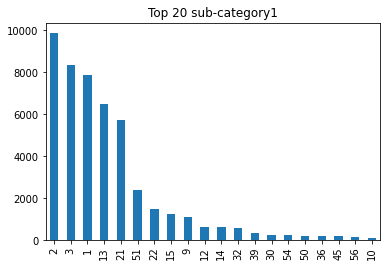

In [11]:
data['sub_category1'].value_counts()[:20].plot(kind='bar')
plt.title('Top 20 sub-category1')
plt.show()

* Most of the tickets generated have sub-category-1 of class-2, then followed by class-3.
* Almost 80% of the tickets belongs these five sub-category-1.**( class-2, class-3, class-1, class-13 and class-21 )**
* Rest sub-categories are very less probable.

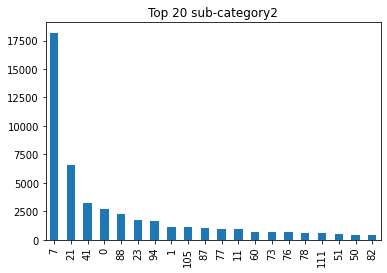

In [12]:
data['sub_category2'].value_counts()[:20].plot(kind='bar')
plt.title('Top 20 sub-category2')
plt.show()

* 36% of the tickets belongs to class-7 of sub-category-2. 

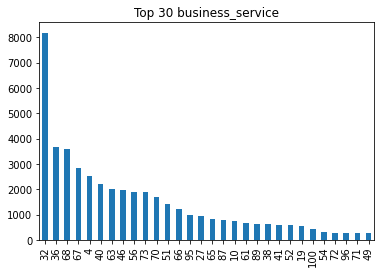

In [13]:
data['business_service'].value_counts()[:30].plot(kind='bar')
plt.title('Top 30 business_service')
plt.show()

* `business_service` of class-32 is most frequent in the dataset.

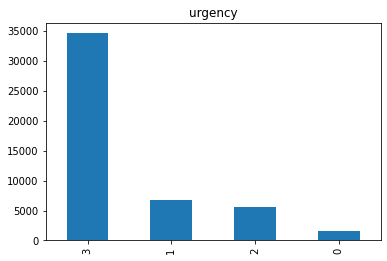

In [14]:
data['urgency'].value_counts().plot(kind='bar')
plt.title('urgency')
plt.show()

* Almost 72% of the tickets have the business `urgency` of level 3.

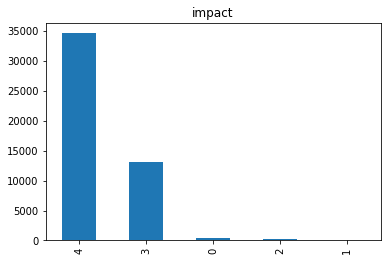

In [15]:
data['impact'].value_counts().plot(kind='bar')
plt.title('impact')
plt.show()

* More than 98% of the tickets have the `impact` of level 4 and of level-3. 

## Bivariate Analysis

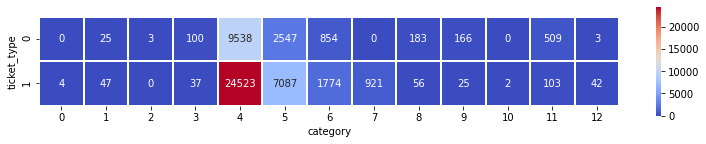

In [16]:
fig, ax = plt.subplots(figsize=(13,2))
ax = sns.heatmap(pd.crosstab(data['ticket_type'],data['category']), annot=True, fmt='.0f', cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* Almost 70% out of the tickets that required human interventions, belongs to category of class-4 and class-5.


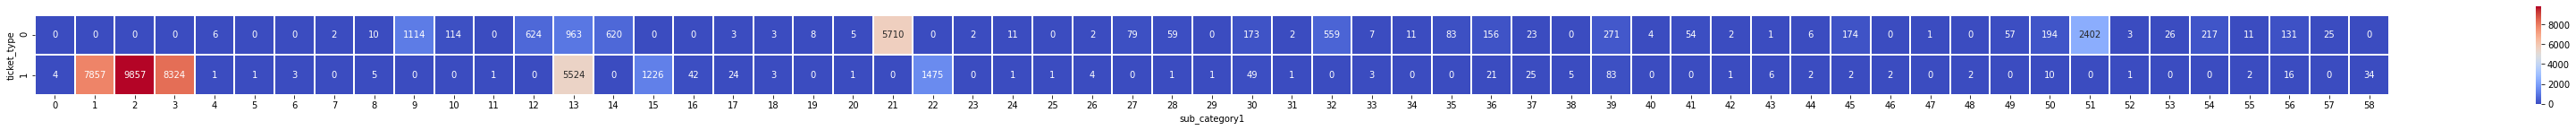

In [17]:
fig, ax = plt.subplots(figsize=(59,2))
ax = sns.heatmap(pd.crosstab(data['ticket_type'],data['sub_category1']), annot=True, fmt='.0f', cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* Ticket having class-2 of `sub_category1` required more human intervention than the rest.

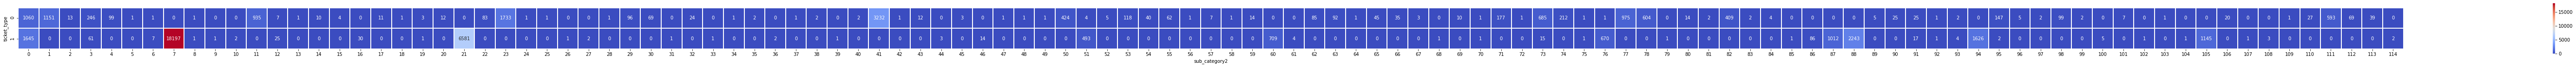

In [18]:
fig, ax = plt.subplots(figsize=(115,2))
ax = sns.heatmap(pd.crosstab(data['ticket_type'],data['sub_category2']), annot=True, fmt='.0f', cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* Ticket having class-7 of `sub_category2`, requires more human intervention than the others, which compromise almost 37.5% of the tickets.

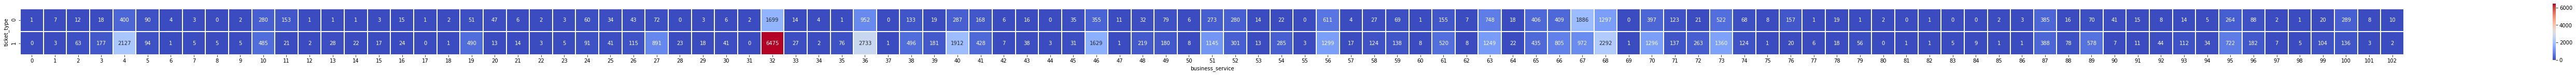

In [19]:
fig, ax = plt.subplots(figsize=(103,2))
ax = sns.heatmap(pd.crosstab(data['ticket_type'],data['business_service']), annot=True, fmt='.0f', cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* Ticket having class-32 of `business_service`, requires more human intervention than the others.

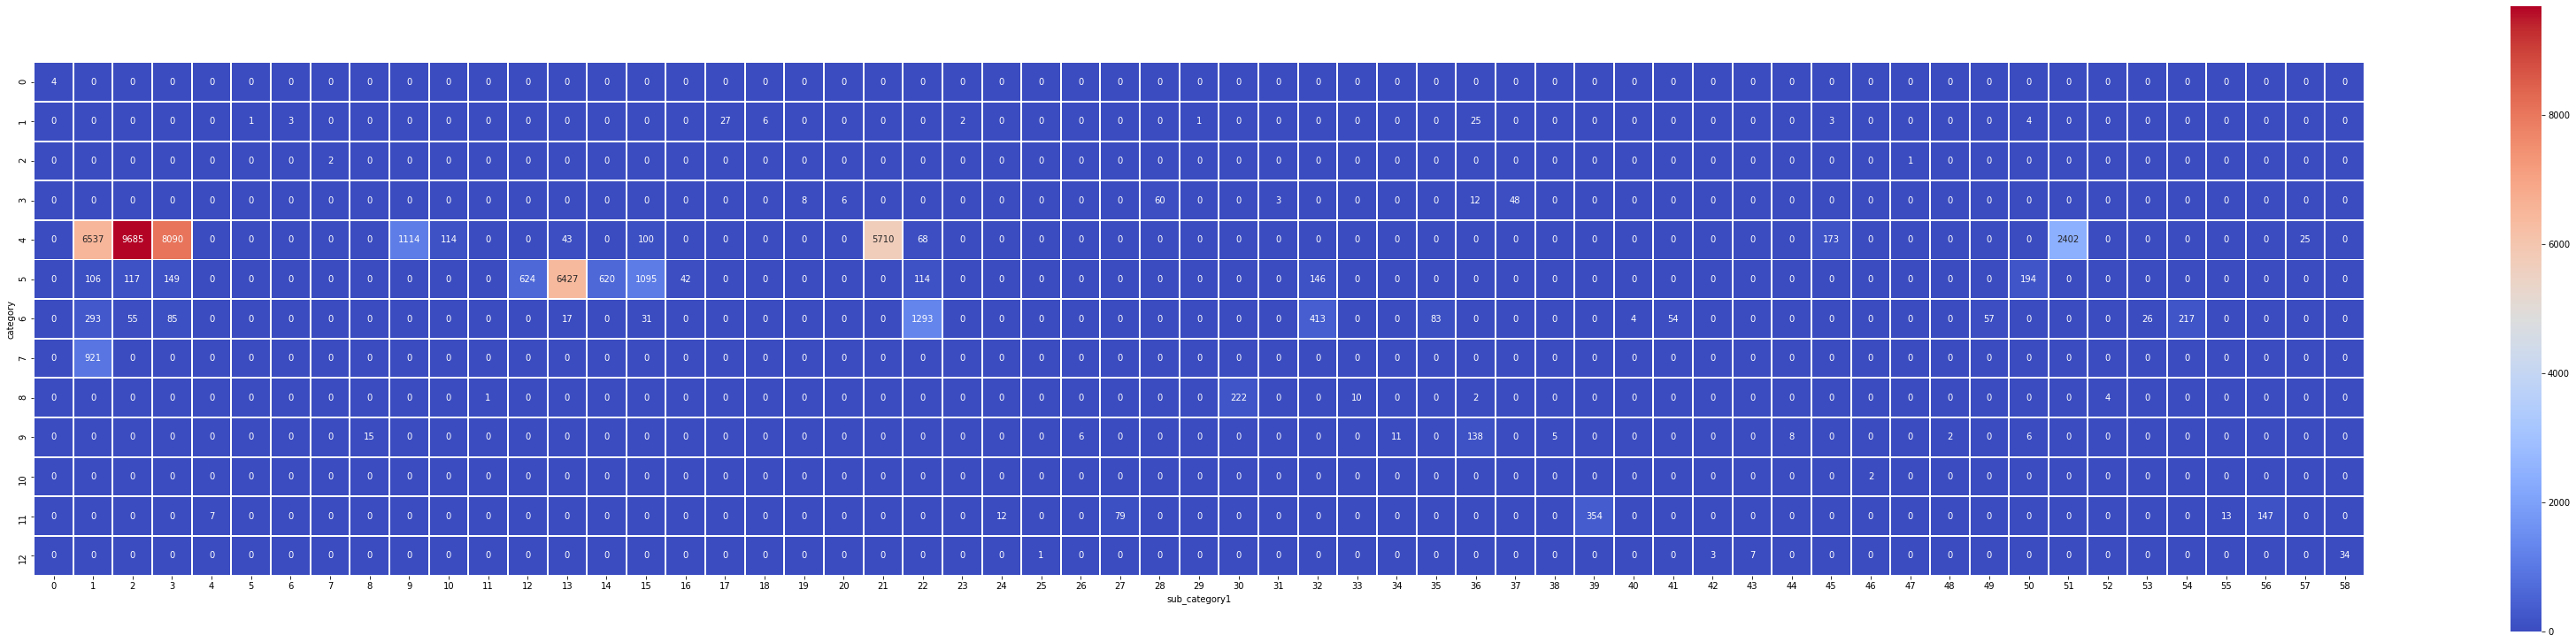

In [20]:
fig, ax = plt.subplots(figsize=(59,13))
ax = sns.heatmap(pd.crosstab(data['category'],data['sub_category1']), annot=True, fmt='.0f', cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* Most of the tickets have class-4 of `category`, and class-2 of `subcategory-1`.
* 50% of tickets have class-4 `category` and belongs to class-1, class-2, class-3 of `sub_category1`

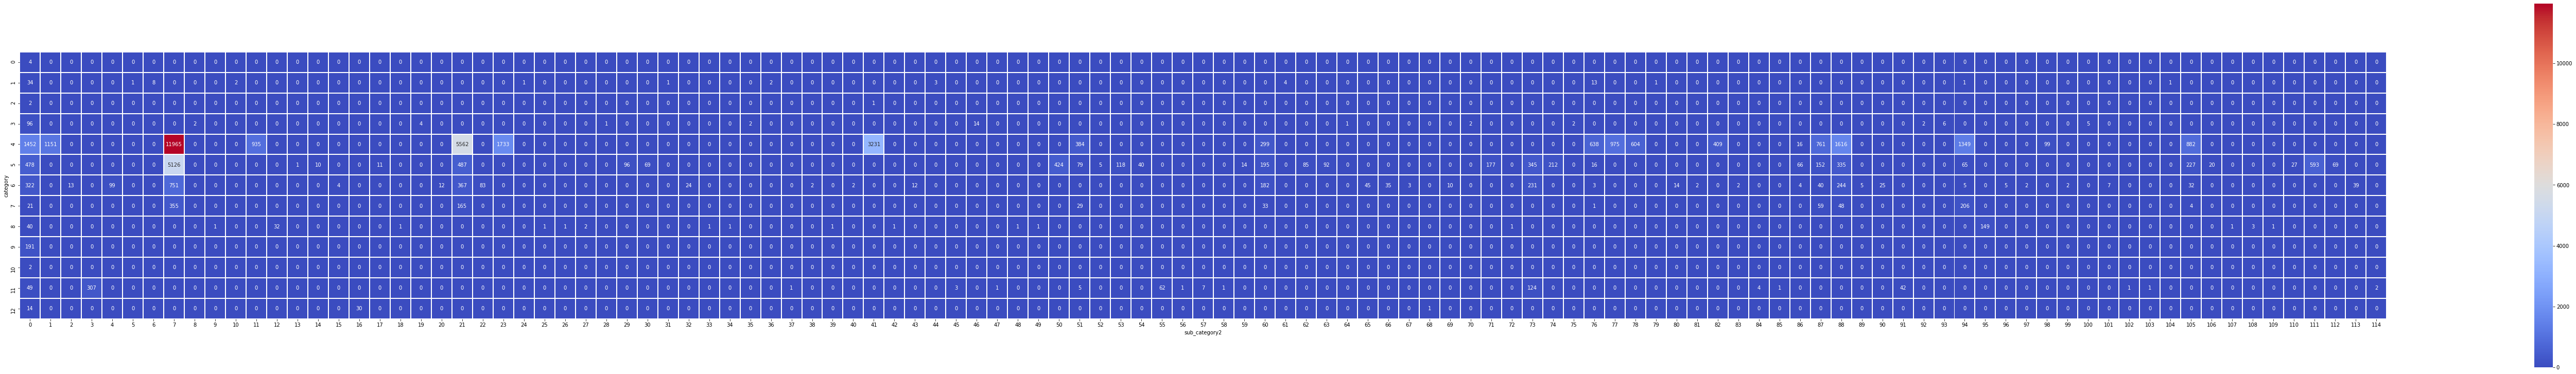

In [21]:
fig, ax = plt.subplots(figsize=(103,13))
ax = sns.heatmap(pd.crosstab(data['category'],data['sub_category2']), annot=True, fmt='.0f', cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* Almost 24.6% of the tickets have class-4 `category` and class-7 `sub_category2`

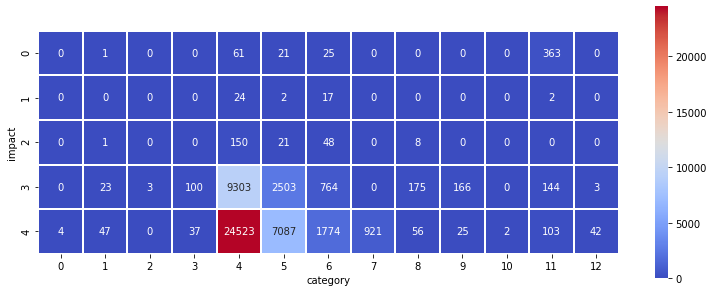

In [22]:
fig, ax = plt.subplots(figsize=(13,5)) 
ax = sns.heatmap(pd.crosstab(data['impact'],data['category']), annot=True, fmt='.0f', cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* More than 65.1% of the total tickets, which belongs to class-4 and class-5 of `category`, have business `impact` level 4.
* More than 91.3% of the tickets having business `impact` level 4, belongs to class-4 and class-5 of `category`.

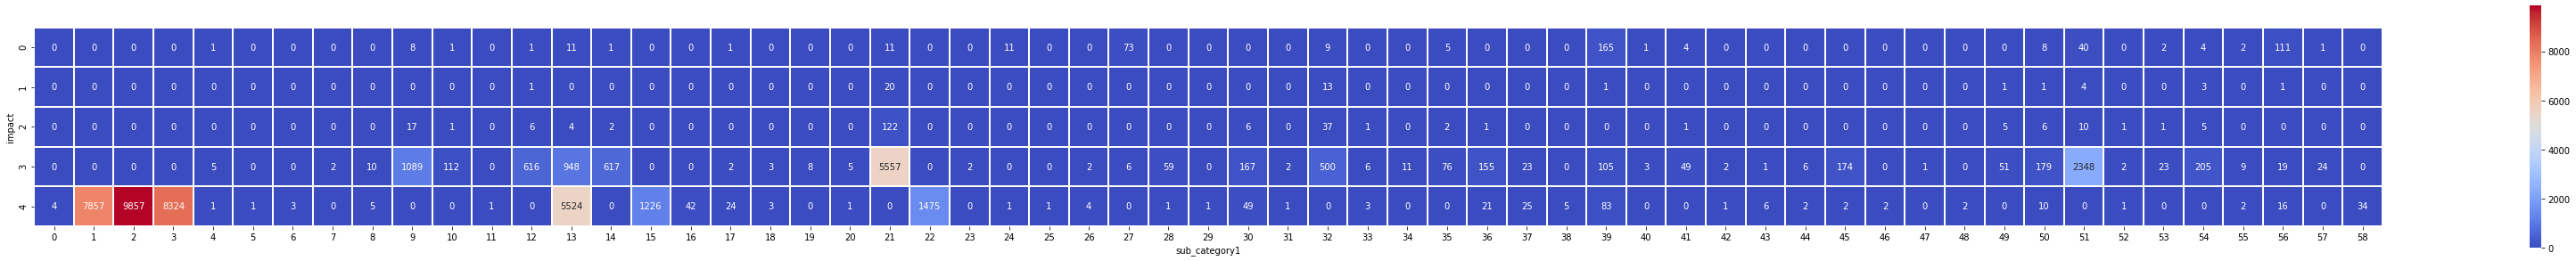

In [23]:
fig, ax = plt.subplots(figsize=(59,5)) 
ax = sns.heatmap(pd.crosstab(data['impact'],data['sub_category1']), annot=True, fmt='.0f', cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* More than 53.6% of tickets having business `impact` of level-4 and belongs to class-1, class-2, class-3 of `sub_category1`.

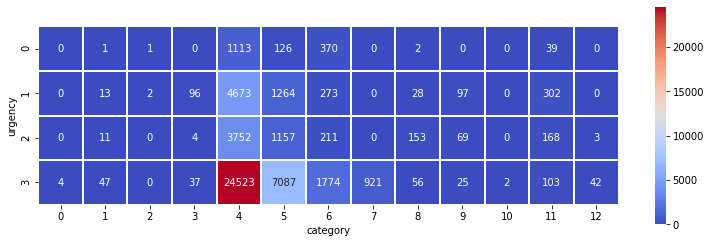

In [24]:
fig, ax = plt.subplots(figsize=(13,4)) 
ax = sns.heatmap(pd.crosstab(data['urgency'],data['category']), annot=True, fmt='.0f',cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* More than 72.3% of the total tickets, which belongs to class-4 and class-5 of `category`, have `urgency` level 3.
* More than 91.3% of the tickets having `urgency` level 3, belongs to class-4 and class-5 of `category`.

**Seems like `urgency` and `impact` is distributed alike for the tickets which required humnan interventions.** 

Now analysing these two columns.

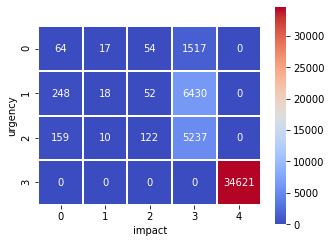

In [25]:
fig, ax = plt.subplots(figsize=(5,4)) 
ax = sns.heatmap(pd.crosstab(data['urgency'],data['impact']), annot=True, fmt='.0f',cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* Majority of the tickets(more than 71.3% of the total) have `urgency` of level-3 and business `impact` of level-4.
* All tickets of `urgency` level-3, have business `impact` of level-4.
* All tickets with business `impact` of level-4, have `urgency` of level-3.

Further, segregating the `urgency` vs `impact` graphs with respect to ticket-type.

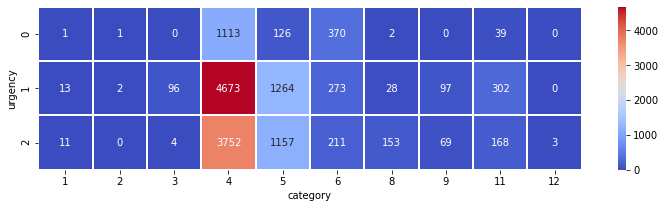

In [26]:
# tickets which doesn't required human interventions

fig, ax = plt.subplots(figsize=(13,3)) 
ax = sns.heatmap(pd.crosstab(data[data['ticket_type']==0]['urgency'],data[data['ticket_type']==0]['category']), annot=True, fmt='.0f',cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* Clearly, ticket whose level of `urgency` is not 3, irrespective of the ticket `category`, does not required human interventions.
* More than 60.5% of the total tickets, belongs to class-4 of `category`, with `urgency` level-2 and level-1. 

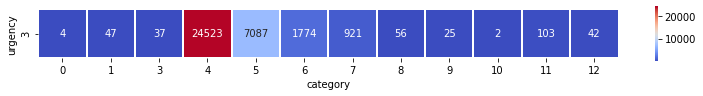

In [27]:
# tickets which required human interventions

fig, ax = plt.subplots(figsize=(13,1)) 
ax = sns.heatmap(pd.crosstab(data[data['ticket_type']==1]['urgency'],data[data['ticket_type']==1]['category']), annot=True, fmt='.0f',cmap= 'coolwarm',linewidth=1, linecolor='w', square=True)
plt.show()

* Irrespective of the ticket `category`, if a ticket has `urgency` of level-3, then it must required human interventions.
* More than 70.7% of the tickets which requires human intervention, belongs to class-4 of ticket `category`.

## Text Analysis

In [28]:
# creating a checkpoint and filling null values
df = data.copy()
df.fillna('', inplace=True)

In [29]:
# joining title and body into info column
df['info'] = df['title'] + ' ' + df['body']

# dropping title and body column
df.drop(columns=['title','body'], inplace=True)

In [30]:
# Adding some basic columns (feature engineering)
df['info_char_length'] = df['info'].apply(lambda x: len(x))
df['word_used'] = df['info'].apply(lambda x: len(x.split()))

In [31]:
# grouping dataframe wrt ticket_type
ticket_df = df.groupby(by='ticket_type')

In [32]:
# Min, Max and Total of info_length and word_used in ticket info
ticket_df.agg(['min','max','sum'])[['info_char_length', 'word_used']]

info_char_length                word_used              
                         min   max      sum       min  max      sum
ticket_type                                                        
0                          6  6880  5016349         2  981   781796
1                          7  7015  9092926         1  953  1325752

In [33]:
# Average length and word used in ticket info
ticket_df.agg(mean_info_length = ('info_char_length', np.mean), mean_word_used = ('word_used', np.mean))

,mean_info_length,mean_word_used
ticket_type,,
0,360.162909,56.131246
1,262.641923,38.293290


## Word Cloud Plotting
  * On whole dataset
  * On tickets which doesn't requires human interventions(ticket-type 0).
  * On tickets which requires human interventions(ticket-type 1).


### On whole tickets dataset

In [34]:
text = ' '.join(df['info'])

In [35]:
freq_dict = {}
for val in text.split():
  freq_dict[val.strip()] = freq_dict.get(val.strip(), 0) + 1

freq_dict = sorted(freq_dict.items(), key=operator.itemgetter(1), reverse=True)
freq_dict[:10]

[('please', 70918),
 ('pm', 29353),
 ('hi', 28906),
 ('regards', 27525),
 ('thank', 25261),
 ('for', 24558),
 ('hello', 23275),
 ('you', 21994),
 ('re', 21300),
 ('thanks', 20142)]

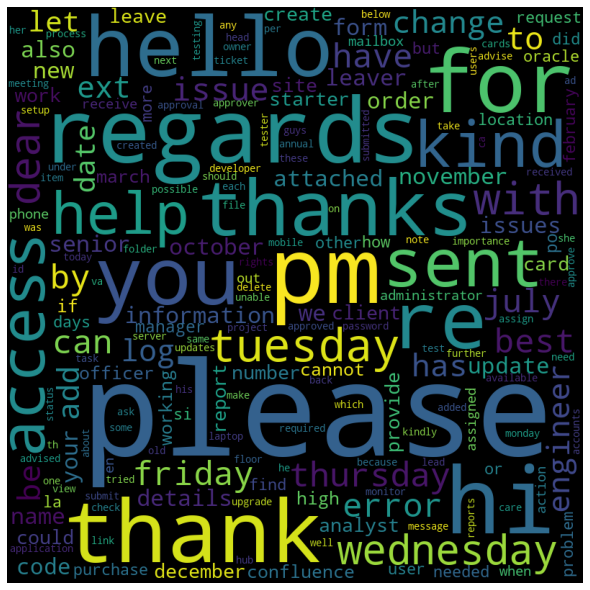

In [36]:
# ploting wordcloud

wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='black', 
            stopwords = set(STOPWORDS), 
            min_font_size = 10).generate_from_frequencies(dict(freq_dict))
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

### Wordcloud on all records with words length greater than 3

In [37]:
freq_dict_1 = {}
for val in text.split():
  if len(val)>3:
    freq_dict_1[val.strip()] = freq_dict_1.get(val.strip(), 0) + 1

freq_dict_1 = sorted(freq_dict_1.items(), key=operator.itemgetter(1), reverse=True)
freq_dict_1[:10]

[('please', 70918),
 ('regards', 27525),
 ('thank', 25261),
 ('hello', 23275),
 ('thanks', 20142),
 ('sent', 14810),
 ('kind', 13375),
 ('access', 13166),
 ('help', 11307),
 ('tuesday', 11039)]

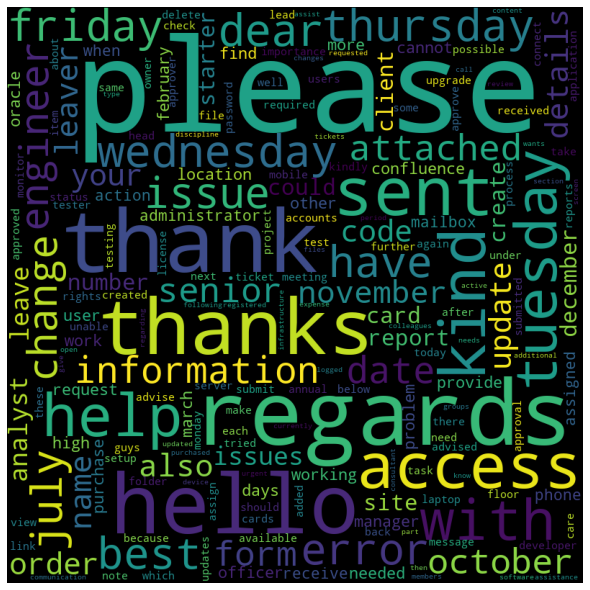

In [38]:
# ploting wordcloud having words with length greater than 3

wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='black', 
            stopwords = set(STOPWORDS), 
            min_font_size = 10).generate_from_frequencies(dict(freq_dict_1))
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

### For tickets which does not required human interventions ( ticket_type = 0 )

In [39]:
# info of tickets with ticket_type=0
text_0 = ' '.join(df[df['ticket_type']==0]['info'])

freq_dict_2 = {}
for val in text_0.split():
  freq_dict_2[val.strip()] = freq_dict_2.get(val.strip(), 0) + 1

freq_dict_2 = sorted(freq_dict_2.items(), key=operator.itemgetter(1), reverse=True)
freq_dict_2[:10]

[('you', 21950),
 ('for', 18649),
 ('please', 17659),
 ('sent', 14761),
 ('with', 10210),
 ('can', 9517),
 ('have', 9459),
 ('hi', 7994),
 ('error', 7217),
 ('regards', 7184)]

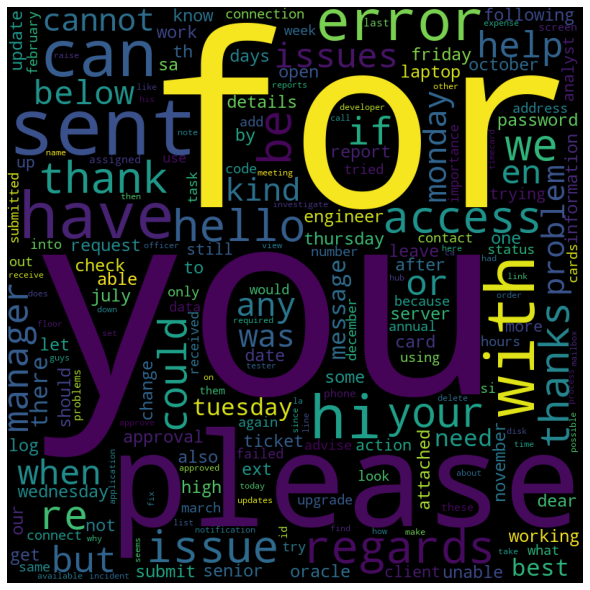

In [40]:
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='black', 
                      stopwords = set(STOPWORDS), 
                      min_font_size = 10).generate_from_frequencies(dict(freq_dict_2))
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

### For tickets which does required human interventions ( ticket_type = 1 )

In [41]:
# info of tickets with ticket_type=0
text_1 = ' '.join(df[df['ticket_type']==1]['info'])

freq_dict_3 = {}
for val in text_1.split():
  freq_dict_3[val.strip()] = freq_dict_3.get(val.strip(), 0) + 1

freq_dict_3 = sorted(freq_dict_3.items(), key=operator.itemgetter(1), reverse=True)
freq_dict_3[:10]

[('please', 53259),
 ('pm', 29323),
 ('hi', 20912),
 ('regards', 20341),
 ('thank', 19177),
 ('hello', 16907),
 ('re', 16087),
 ('thanks', 14901),
 ('kind', 10261),
 ('tuesday', 8312)]

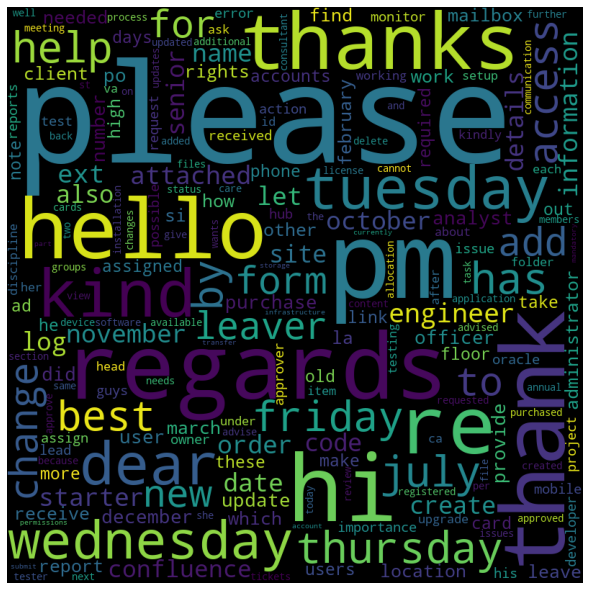

In [42]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='black', 
                      stopwords = set(STOPWORDS), 
                      min_font_size = 10).generate_from_frequencies(dict(freq_dict_3))
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Thank You